# Principal Component Analysis (PCA) Assignment 6
## Pacific Sea Surface Temperatures (PSST)


Importing the libraries we gonna use

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.io import loadmat

Loading the data from the .mat file

In [3]:
data = loadmat('SSTPac.mat', squeeze_me=True)
PSSTA = data['PSSTA']
PSSTA_copy = PSSTA.copy()
PSSTA_copy[np.isnan(PSSTA_copy)] = 0
print(f"Number of elements: {PSSTA_copy.shape}\nMin value {np.min(PSSTA_copy)} Max value {np.max(PSSTA_copy)}")
PSSTA

Number of elements: (2520, 396)
Min value -3.5828094 Max value 6.5251522


array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-1.0310936 , -1.0396061 , -1.0179672 , ...,  0.96164131,
         1.1010151 ,  0.4607048 ],
       [-1.0575008 , -1.0964069 , -0.99218941, ...,  0.90663719,
         0.80929375,  0.32960701],
       [-1.0271854 , -0.9305439 , -0.72031403, ...,  0.88406372,
         0.76242447,  0.59226418]])

TODO: continue to read in other parts of the data set #######

In [113]:
lat = data['lat'] # Latitude
lon = data['lon'] # Longitude
lonmin = data['lonmin'] # Min longitude
lonmax = data['lonmax'] # Max Longitude
latmin = data['latmin'] # Min Latitude
latmax = data['latmax'] # Max Latitude
yd = data['yd'] # Years
land = data["land"] # Land

In [5]:
print(data.keys())
print(f"PSSTA shape: {data['PSSTA'].shape}\nLongitud shape:{data['lon'].shape} Max value: {lonmax} Min value: {lonmin}\nLatitude shape:{data['lat'].shape} Max value: {latmax} Min value: {latmin}\n")
print(f"Years: from {round(yd.min())} to {round(yd.max())}")

dict_keys(['__header__', '__version__', '__globals__', 'PSSTA', 'lon', 'lat', 'yd', 'lonmin', 'lonmax', 'latmin', 'latmax', 'land'])
PSSTA shape: (2520, 396)
Longitud shape:(2520,) Max value: 290 Min value: 124
Latitude shape:(2520,) Max value: 29 Min value: -29

Years: from 1970 to 2003


TODO: compute the number of latitude and longitude grid points


In [6]:
nlat = len(np.unique(lat)) # [30]
nlon = len(np.unique(lon)) # [84]
print(f"Number of grids:\nLongitud {nlon} x {nlat} Latitude")

Number of grids:
Longitud 84 x 30 Latitude


### Assert
Check that the
number of grid points in each direction is consistent
with the size of the data:

In [7]:
print(nlat * nlon)
print(len(PSSTA[:, 0]))
assert nlat * nlon == len(PSSTA[:, 0])

2520
2520


TODO: select a good color map that is consistent with the meaning of the data
Values which are NaN will now show as black

In [80]:
cmap = plt.get_cmap('viridis')  # Viridis is good
cmap.set_bad(color='k') 

Lets visualizate an example of how the map look like

Text(0.5, 1.0, '1998')

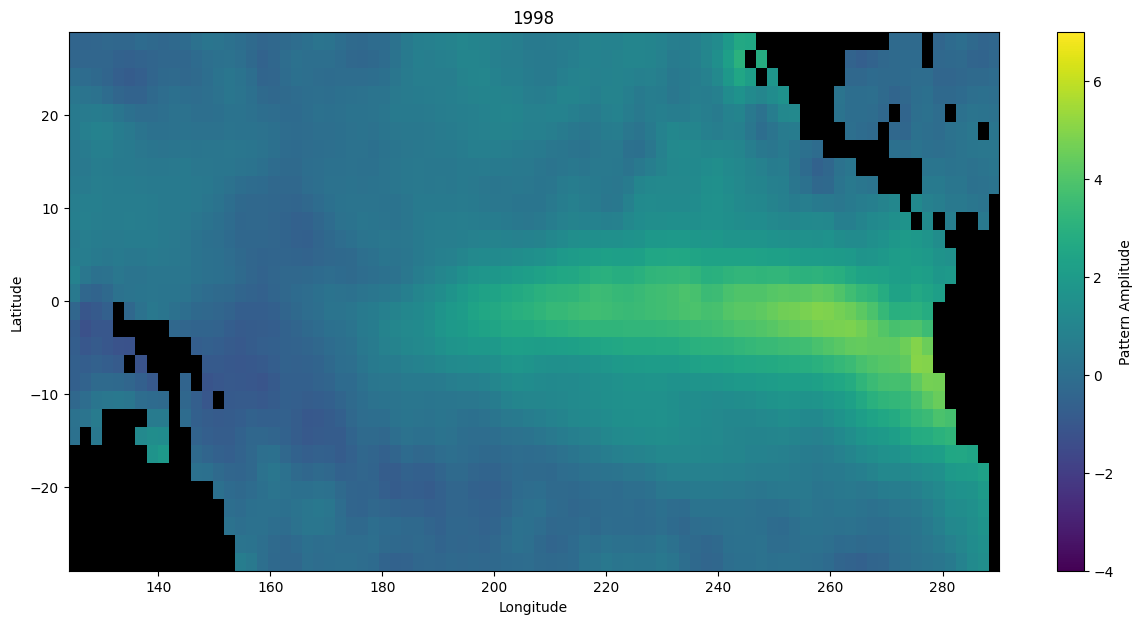

In [106]:
fig, ax = plt.subplots(figsize=(4, 2))
fig.set_size_inches(15, 7)

# Example
image = ax.imshow(PSSTA[:,333].reshape(nlat, nlon),
                           cmap=cmap, aspect='auto',
                           vmin=-4, vmax=7,
                           interpolation='none',
                           origin='lower',
                           extent=[lonmin, lonmax, latmin, latmax])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
fig.colorbar(image, ax=ax, label='Pattern Amplitude')
ax.set_title(round(yd[333]))

## Problem 1
TODO: Replace all NaN entries by zero #######
We use the numpy function sinan to identify all the NaN values and replace them with 0

In [10]:
S = PSSTA.copy()
S[np.isnan(S)] = 0
S

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.0310936 , -1.0396061 , -1.0179672 , ...,  0.96164131,
         1.1010151 ,  0.4607048 ],
       [-1.0575008 , -1.0964069 , -0.99218941, ...,  0.90663719,
         0.80929375,  0.32960701],
       [-1.0271854 , -0.9305439 , -0.72031403, ...,  0.88406372,
         0.76242447,  0.59226418]])

TODO: Make sure the time series of each data point is mean-free #######


In [11]:
S = S - np.mean(S, axis=1)[:, np.newaxis]
S

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94837472, -0.95688722, -0.93524832, ...,  1.04436019,
         1.18373398,  0.54342368],
       [-1.03918245, -1.07808855, -0.97387106, ...,  0.92495554,
         0.8276121 ,  0.34792536],
       [-1.08190611, -0.98526461, -0.77503474, ...,  0.82934301,
         0.70770376,  0.53754347]])

TODO: Peform SVD #######

Singular value decomposition matrices: 

A = U Σ V^T


U: Left singular vectors

Σ: Singular values

V^T: Right singular vectors

In [102]:
U, Sigma, VT = np.linalg.svd(S, full_matrices=False)

# Matrix with the zeros Sigma
zeroed_S = np.zeros_like(S)
np.fill_diagonal(zeroed_S, Sigma)

norm_Sigma = (Sigma**2).sum()
norm_sq_S = (S**2).sum()

print(f"Total variance from eigenvalues: {norm_Sigma}\nVariance from S data: {norm_sq_S}")

Total variance from eigenvalues: 370259.09688890004
Variance from S data: 370259.0968889001


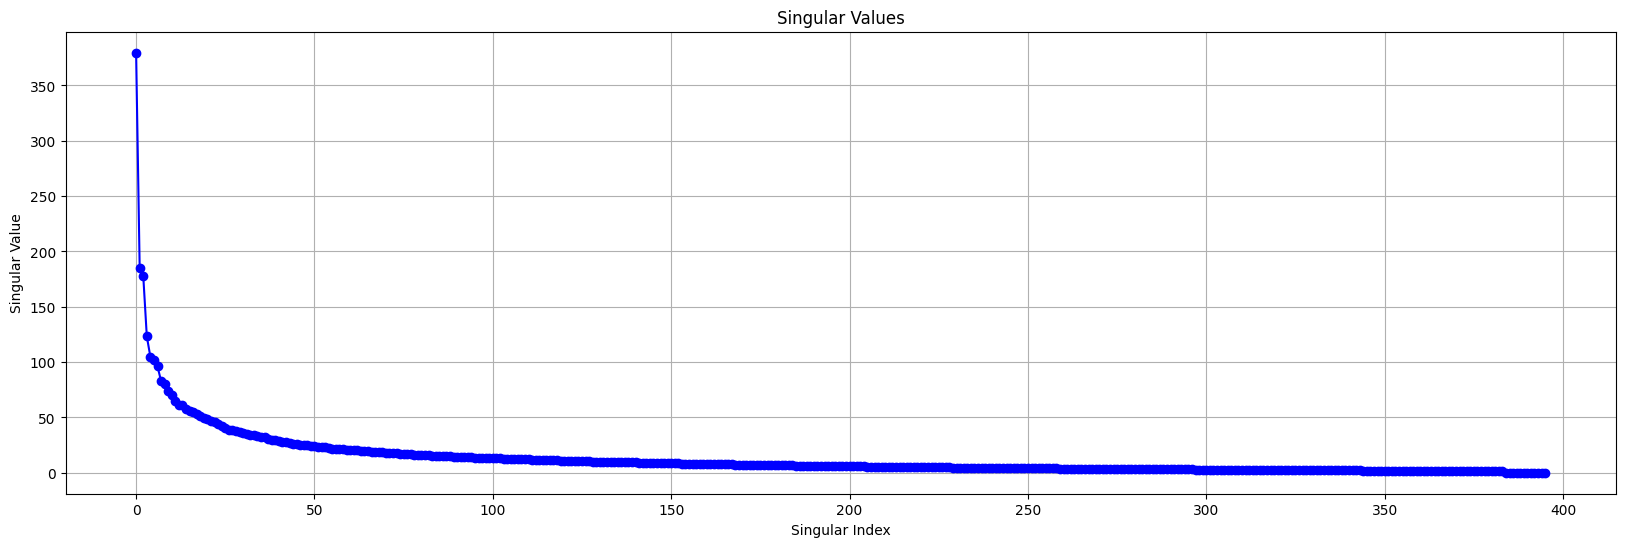

In [50]:
plt.figure(figsize=(20, 6))
plt.plot(Sigma, marker='o',  color='b')  # Plot only the first 20 eigenvalues , linestyle='-',
plt.title('Singular Values')
plt.xlabel('Singular Index')
plt.ylabel('Singular Value')
#plt.xticks(np.arange(1, 21), np.round(Sigma[:20]))  # Set x-axis ticks to be the first 20 eigenvalues
plt.grid(True)
plt.show()

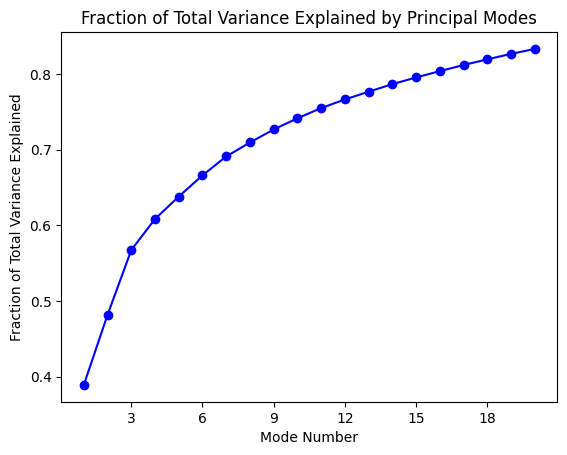

In [65]:
explained_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
fig, ax = plt.subplots()

plt.plot(np.arange(1, 21), explained_variance[:20],marker='o' ,color='blue')
ax.set_xlabel('Mode Number')
ax.set_ylabel('Fraction of Total Variance Explained')
ax.set_title('Fraction of Total Variance Explained by Principal Modes')

ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # Ensure that x-axis has only integer ticks


## Problem 2

### Most important Pattern

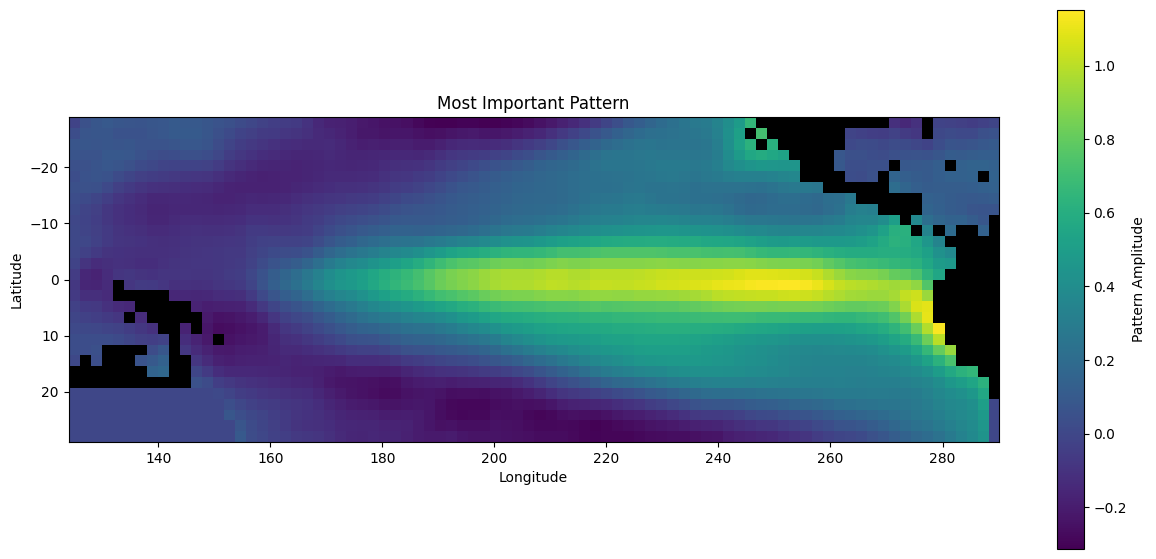

In [173]:
# Plot the most important pattern
fig, ax = plt.subplots()
mipattern = U[:, 0]
mi_pattern_grid = mipattern.reshape((nlat, nlon))

# Renormalize patterns for easier interpretations
pattern_norm = - mi_pattern_grid*Sigma[0]/np.sqrt(len(yd))

im = ax.imshow(pattern_norm, cmap=cmap, extent=[lonmin, lonmax, latmin, latmax])
ax.set_title('Most Important Pattern')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.invert_yaxis()
fig.colorbar(im, ax=ax, label='Pattern Amplitude')
im.set_array(np.where(pattern_norm == 0, np.nan, pattern_norm))
fig.set_size_inches(15, 7)

### Principal component

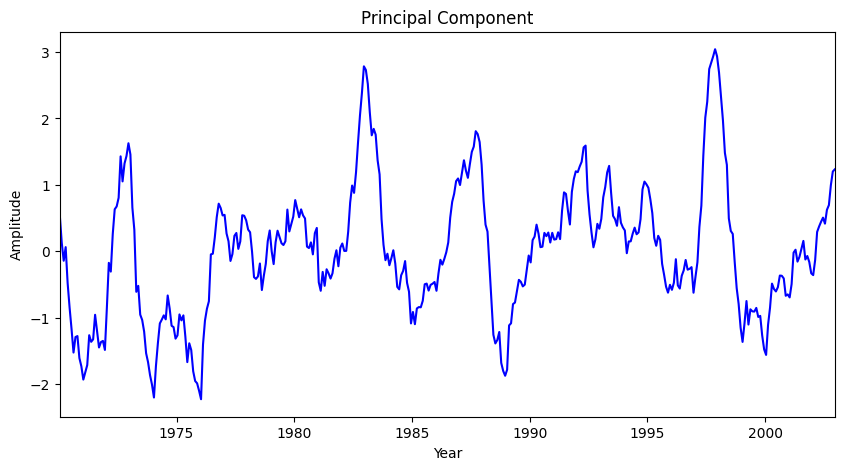

In [112]:
fig, ax = plt.subplots()

pc_1 = -VT[0, :]*np.sqrt(len(yd)-1)
ax.plot(yd, pc_1, color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Amplitude')
ax.set_title('Principal Component')
ax.set_xlim([yd[0], yd[-1]])
fig.set_size_inches(10, 5)

# Problem 3

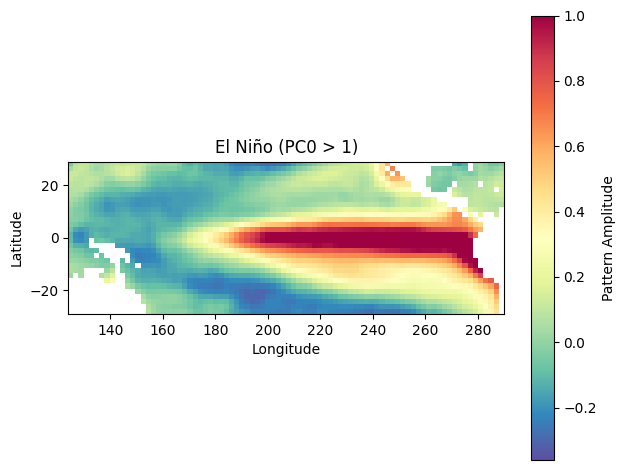

In [176]:
fig, (ax1) = plt.subplots()
ax1.set_title('El Niño (PC0 > 1)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

ElNino = (pc_1 > 1)
cmap1 = plt.get_cmap('Spectral_r')

SSTA_ElNino = np.mean(S[:, ElNino], axis=1) / np.mean(pc_1[ElNino])
# Reshape SSTA_ElNino to a 2D grid
SSTA_ElNino_grid = np.reshape(SSTA_ElNino, (nlat, nlon))

# Plot El Nino pattern
im1 = ax1.imshow(SSTA_ElNino_grid, cmap=cmap1, extent=[lonmin, lonmax, latmin, latmax], origin='lower', vmin=-0.36, vmax=1)
im1.set_array(np.where( SSTA_ElNino_grid == 0, np.nan, SSTA_ElNino_grid))

# Add colorbars
fig.colorbar(im1, ax=ax1, label='Pattern Amplitude')


# Adjust layout
plt.tight_layout()


### La Niña

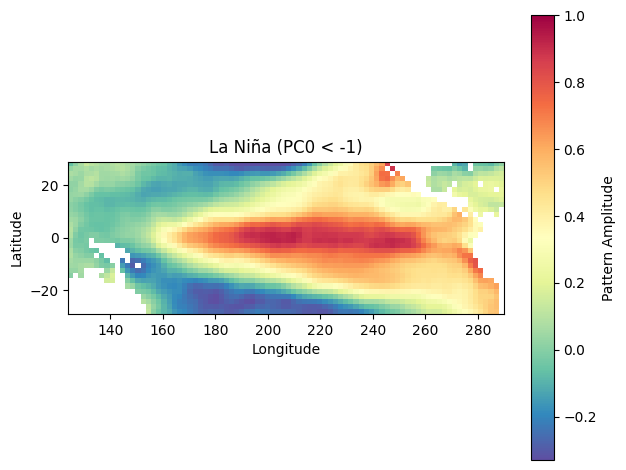

In [177]:
fig, (ax1) = plt.subplots()
ax1.set_title('La Niña (PC0 < -1)')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

LaNina = (pc_1 < -1)
SSTA_LaNina = np.mean(S[:, LaNina], axis=1) / np.mean(pc_1[LaNina])
# Reshape SSTA_LaNina to a 2D grid
SSTA_LaNina_grid = np.reshape(SSTA_LaNina, (nlat, nlon))

# Plot La Nina pattern
im2 = ax1.imshow(SSTA_LaNina_grid, cmap=cmap1, extent=[lonmin, lonmax, latmin, latmax], origin='lower', vmin=-0.33, vmax=1)
im2.set_array(np.where(SSTA_LaNina_grid == 0, np.nan, SSTA_LaNina_grid))

fig.colorbar(im2, ax=ax1, label='Pattern Amplitude')
# Adjust layout
plt.tight_layout()


### Comment on what you see
We can see that both graphs are very similar, because the color of the temperatures matches a lot, but we can see that in "El Niño" graph the temperatures are a little it higher specially around the latitude 0

# Problem 4

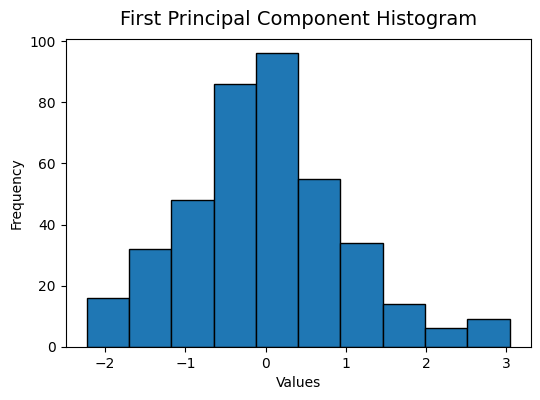

In [183]:
figure = plt.figure(figsize=(6, 4), dpi=100)
plt.hist(pc_1, bins=10, ec="black")
plt.title("First Principal Component Histogram", fontsize=14, pad=10)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()